In [40]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from xgboost import XGBRFClassifier

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from scipy.stats import yeojohnson
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, recall_score, roc_auc_score
from sklearn.metrics import confusion_matrix

from skopt import BayesSearchCV
from skopt.space import Real,Integer,Categorical

#ignore all warnings
import warnings
warnings.filterwarnings(action= 'ignore')

#set some parameters for the matplotlib and pandas
mpl.rcParams['figure.figsize'] = [16, 9]

In [41]:
df=pd.read_csv('nasa.csv')

In [42]:
df

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.600,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.300,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.300,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.400,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.600,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4682,3759007,3759007,23.900,0.044112,0.098637,44.111820,98.637028,0.027410,0.061290,144.723824,...,164.183305,457.179984,0.741558,276.395697,1.581299,2.457708e+06,304.306025,0.787436,J2000,False
4683,3759295,3759295,28.200,0.006089,0.013616,6.089126,13.615700,0.003784,0.008460,19.977449,...,345.225230,407.185767,0.996434,42.111064,1.153835,2.458088e+06,282.978786,0.884117,J2000,False
4684,3759714,3759714,22.700,0.076658,0.171412,76.657557,171.411509,0.047633,0.106510,251.501180,...,37.026468,690.054279,0.965760,274.692712,2.090708,2.458300e+06,203.501147,0.521698,J2000,False
4685,3759720,3759720,21.800,0.116026,0.259442,116.025908,259.441818,0.072095,0.161210,380.662441,...,163.802910,662.048343,1.185467,180.346090,1.787733,2.458288e+06,203.524965,0.543767,J2000,False


In [43]:
for i in df.columns:
    j=i.replace(' ','_')
    df.rename(columns={i:j}, inplace=True)

In [44]:
category_cols = df.select_dtypes(include='object')
num_cols = df.select_dtypes(exclude='object')

In [45]:
df.columns

Index(['Neo_Reference_ID', 'Name', 'Absolute_Magnitude', 'Est_Dia_in_KM(min)',
       'Est_Dia_in_KM(max)', 'Est_Dia_in_M(min)', 'Est_Dia_in_M(max)',
       'Est_Dia_in_Miles(min)', 'Est_Dia_in_Miles(max)',
       'Est_Dia_in_Feet(min)', 'Est_Dia_in_Feet(max)', 'Close_Approach_Date',
       'Epoch_Date_Close_Approach', 'Relative_Velocity_km_per_sec',
       'Relative_Velocity_km_per_hr', 'Miles_per_hour',
       'Miss_Dist.(Astronomical)', 'Miss_Dist.(lunar)',
       'Miss_Dist.(kilometers)', 'Miss_Dist.(miles)', 'Orbiting_Body',
       'Orbit_ID', 'Orbit_Determination_Date', 'Orbit_Uncertainity',
       'Minimum_Orbit_Intersection', 'Jupiter_Tisserand_Invariant',
       'Epoch_Osculation', 'Eccentricity', 'Semi_Major_Axis', 'Inclination',
       'Asc_Node_Longitude', 'Orbital_Period', 'Perihelion_Distance',
       'Perihelion_Arg', 'Aphelion_Dist', 'Perihelion_Time', 'Mean_Anomaly',
       'Mean_Motion', 'Equinox', 'Hazardous'],
      dtype='object')

In [46]:
df['Hazardous'].replace({True:1, False:0}, inplace = True)

In [47]:
df

,Neo_Reference_ID,Name,Absolute_Magnitude,Est_Dia_in_KM(min),Est_Dia_in_KM(max),Est_Dia_in_M(min),Est_Dia_in_M(max),Est_Dia_in_Miles(min),Est_Dia_in_Miles(max),Est_Dia_in_Feet(min),...,Asc_Node_Longitude,Orbital_Period,Perihelion_Distance,Perihelion_Arg,Aphelion_Dist,Perihelion_Time,Mean_Anomaly,Mean_Motion,Equinox,Hazardous
0,3703080,3703080,21.600,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,1
1,3723955,3723955,21.300,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,0
2,2446862,2446862,20.300,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,1
3,3092506,3092506,27.400,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,0
4,3514799,3514799,21.600,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4682,3759007,3759007,23.900,0.044112,0.098637,44.111820,98.637028,0.027410,0.061290,144.723824,...,164.183305,457.179984,0.741558,276.395697,1.581299,2.457708e+06,304.306025,0.787436,J2000,0
4683,3759295,3759295,28.200,0.006089,0.013616,6.089126,13.615700,0.003784,0.008460,19.977449,...,345.225230,407.185767,0.996434,42.111064,1.153835,2.458088e+06,282.978786,0.884117,J2000,0
4684,3759714,3759714,22.700,0.076658,0.171412,76.657557,171.411509,0.047633,0.106510,251.501180,...,37.026468,690.054279,0.965760,274.692712,2.090708,2.458300e+06,203.501147,0.521698,J2000,0
4685,3759720,3759720,21.800,0.116026,0.259442,116.025908,259.441818,0.072095,0.161210,380.662441,...,163.802910,662.048343,1.185467,180.346090,1.787733,2.458288e+06,203.524965,0.543767,J2000,0


In [48]:
for i in category_cols.columns:
    print(f"{i}: {df[i].nunique()}")

Close_Approach_Date: 777
Orbiting_Body: 1
Orbit_Determination_Date: 2680
Equinox: 1


In [49]:
df.drop(['Orbiting_Body', 'Equinox', 'Neo_Reference_ID'], axis=1, inplace=True)

In [50]:
df['Close_Approach_Date'] = pd.to_datetime(df['Close_Approach_Date'])
df['Orbit_Determination_Date'] = pd.to_datetime(df['Orbit_Determination_Date'])

In [51]:
df['Close_Approach_Date'] = df['Close_Approach_Date'].astype('int64')

<function matplotlib.pyplot.show(close=None, block=None)>

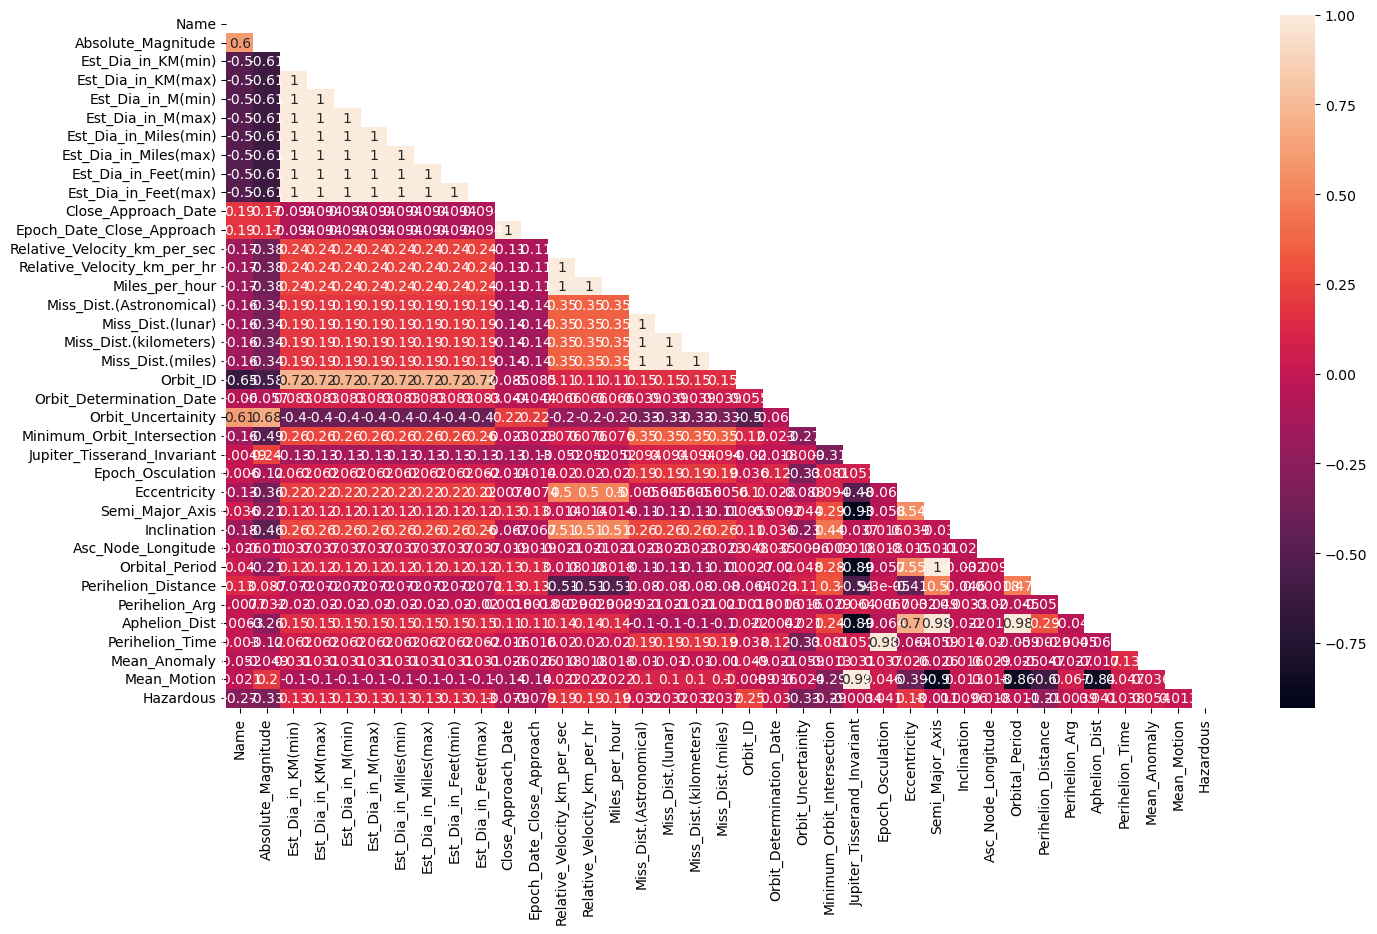

In [52]:
sns.heatmap(df.corr(), mask=np.triu(np.ones_like(df.corr())), annot=True)
plt.show

In [53]:
df.corr()['Hazardous']

Name                           -0.269028
Absolute_Magnitude             -0.325522
Est_Dia_in_KM(min)              0.132424
Est_Dia_in_KM(max)              0.132424
Est_Dia_in_M(min)               0.132424
Est_Dia_in_M(max)               0.132424
Est_Dia_in_Miles(min)           0.132424
Est_Dia_in_Miles(max)           0.132424
Est_Dia_in_Feet(min)            0.132424
Est_Dia_in_Feet(max)            0.132424
Close_Approach_Date            -0.079020
Epoch_Date_Close_Approach      -0.079020
Relative_Velocity_km_per_sec    0.191970
Relative_Velocity_km_per_hr     0.191970
Miles_per_hour                  0.191970
Miss_Dist.(Astronomical)        0.032407
Miss_Dist.(lunar)               0.032407
Miss_Dist.(kilometers)          0.032407
Miss_Dist.(miles)               0.032407
Orbit_ID                        0.247369
Orbit_Determination_Date        0.029974
Orbit_Uncertainity             -0.328721
Minimum_Orbit_Intersection     -0.288949
Jupiter_Tisserand_Invariant    -0.003404
Epoch_Osculation

In [54]:
df.drop(['Est_Dia_in_KM(min)','Est_Dia_in_KM(max)','Est_Dia_in_M(min)','Est_Dia_in_M(max)','Est_Dia_in_Miles(min)','Est_Dia_in_Miles(max)',
         'Est_Dia_in_Feet(min)','Epoch_Date_Close_Approach','Relative_Velocity_km_per_sec','Relative_Velocity_km_per_hr','Miss_Dist.(Astronomical)','Miss_Dist.(lunar)',
         'Miss_Dist.(kilometers)','Miss_Dist.(miles)','Orbit_Determination_Date','Jupiter_Tisserand_Invariant','Epoch_Osculation','Semi_Major_Axis','Inclination','Asc_Node_Longitude',
         'Orbital_Period','Perihelion_Arg','Aphelion_Dist','Perihelion_Time','Mean_Motion'],axis=1,inplace=True)

<function matplotlib.pyplot.show(close=None, block=None)>

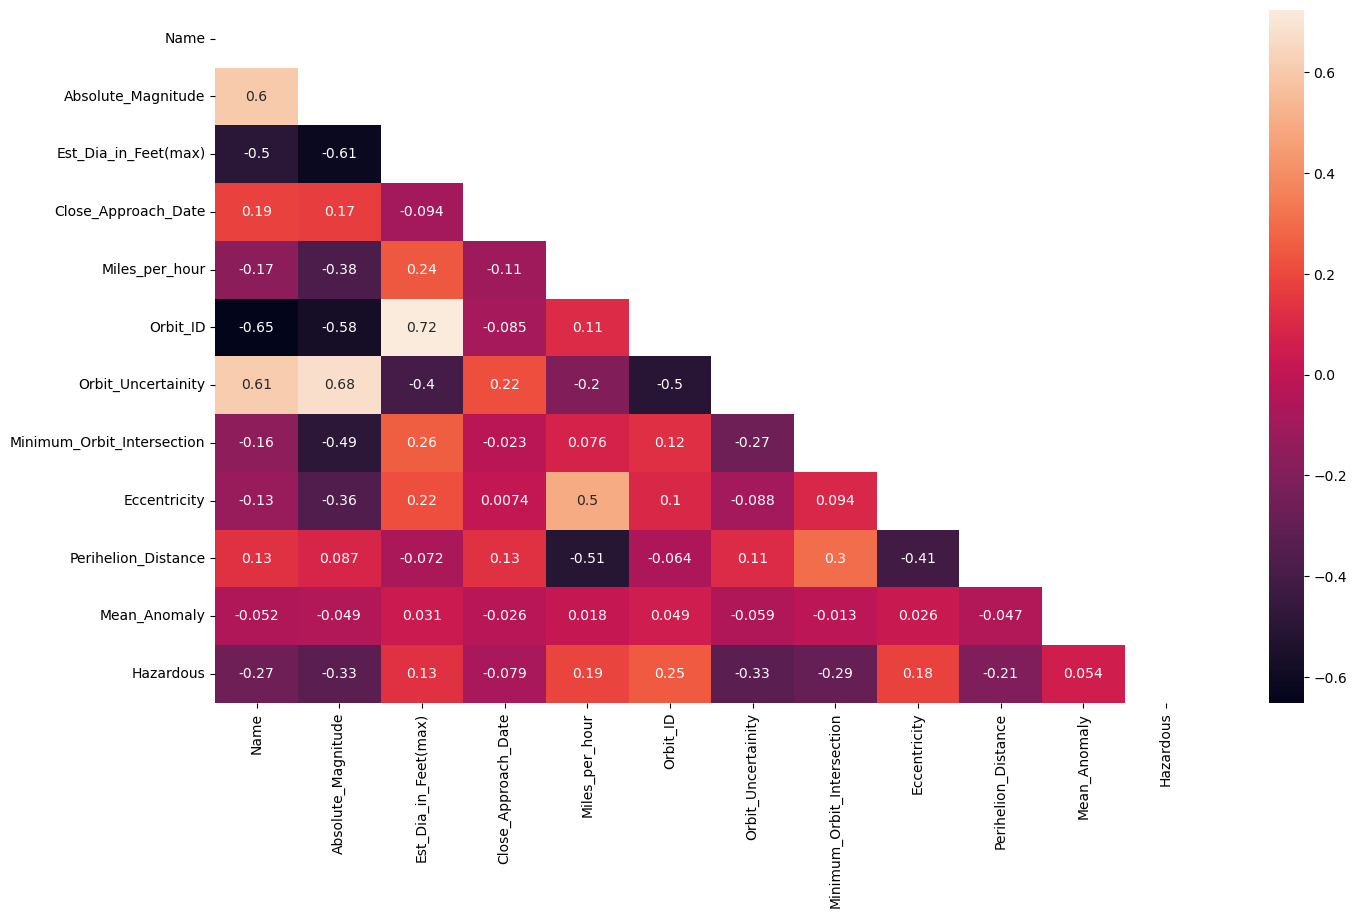

In [55]:
sns.heatmap(df.corr(), mask=np.triu(np.ones_like(df.corr())), annot=True)
plt.show

In [56]:
df.corr()['Hazardous']

Name                         -0.269028
Absolute_Magnitude           -0.325522
Est_Dia_in_Feet(max)          0.132424
Close_Approach_Date          -0.079020
Miles_per_hour                0.191970
Orbit_ID                      0.247369
Orbit_Uncertainity           -0.328721
Minimum_Orbit_Intersection   -0.288949
Eccentricity                  0.183269
Perihelion_Distance          -0.207027
Mean_Anomaly                  0.054164
Hazardous                     1.000000
Name: Hazardous, dtype: float64

In [57]:
df['Close_Approach_Date'] = pd.to_datetime(df['Close_Approach_Date']).dt.year

In [58]:
df['Close_Approach_Date']=df['Close_Approach_Date'].astype('category')
df['Name']=df['Name'].astype('category')

In [59]:
df['Close_Approach_Date'] = df['Close_Approach_Date'].cat.codes
df['Name'] = df['Name'].cat.codes

In [60]:
one=OneHotEncoder()
one.fit_transform([['Close_Approach_Date','Name']])

<1x2 sparse matrix of type '<class 'numpy.float64'>'
	with 2 stored elements in Compressed Sparse Row format>

In [61]:
df.columns

Index(['Name', 'Absolute_Magnitude', 'Est_Dia_in_Feet(max)',
       'Close_Approach_Date', 'Miles_per_hour', 'Orbit_ID',
       'Orbit_Uncertainity', 'Minimum_Orbit_Intersection', 'Eccentricity',
       'Perihelion_Distance', 'Mean_Anomaly', 'Hazardous'],
      dtype='object')

In [62]:
df['Est_Dia_in_Feet(max)'].skew()

17.670107245771746

In [63]:
pt = PowerTransformer(method='yeo-johnson', standardize=True)
transformed_data = pt.fit_transform(np.array(df['Est_Dia_in_Feet(max)']).reshape(-1, 1))

In [64]:
df['Transformed_Est_Dia_in_Feet(max)']=transformed_data.flatten()

In [65]:
df['Transformed_Est_Dia_in_Feet(max)'].skew()

-0.014313707922897413

In [66]:
X=df.drop(['Hazardous'], axis=1)
y=df["Hazardous"]

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [68]:
nm_scaler=MinMaxScaler()
X_train=nm_scaler.fit_transform(X_train)
X_test=nm_scaler.fit_transform(X_test)

In [69]:
xgb=XGBRFClassifier()

In [70]:
parametrs ={
    'learning_rate':[0.01,0.03,0.05,0.07,0.1,0.3,0.25,0.6,0.9],
    'max_depth':[2,4,6,8,10,12],
    'min_child_weight':[1,3,5,7,9],
    'gamma':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
    'colsample_bytree':[0.2,0.3,0.5,0.6,0.7,0.8,0.9]
}

In [71]:
grid = RandomizedSearchCV(estimator=xgb, 
                          param_distributions=parametrs)

In [72]:
grid.fit(X_train, y_train)
best_params = grid.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'min_child_weight': 7, 'max_depth': 12, 'learning_rate': 0.6, 'gamma': 0.2, 'colsample_bytree': 0.9}


In [73]:
grid.fit(X_train, y_train).best_score_

0.9935982198486872

In [86]:
bayes_xgb=XGBRFClassifier()

In [85]:
byes_parametrs ={
    #'learning_rate':[0.01,0.03,0.05,0.07,0.1,0.3,0.25,0.6,0.9],
    'max_depth':[2,4,6,8,10,12],
    'min_child_weight':[1,3,5,7,9],
    'gamma':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
    'colsample_bytree':[0.2,0.3,0.5,0.6,0.7,0.8,0.9]
}

In [91]:
opt=BayesSearchCV(estimator=bayes_xgb,search_spaces=byes_parametrs)

In [93]:
opt.fit(X_train,y_train)

BayesSearchCV(estimator=XGBRFClassifier(base_score=None, booster=None,
                                        callbacks=None, colsample_bylevel=None,
                                        colsample_bytree=None, device=None,
                                        early_stopping_rounds=None,
                                        enable_categorical=False,
                                        eval_metric=None, feature_types=None,
                                        gamma=None, grow_policy=None,
                                        importance_type=None,
                                        interaction_constraints=None,
                                        max_bin=None, max_cat_threshold=None,
                                        max_cat...
                                        max_leaves=None, min_child_weight=None,
                                        missing=nan, monotone_constraints=None,
                                        multi_strategy=None, n_estimators=None,
                                        n_jobs=None, num_parallel_tree=None,
                                        objective='binary:logistic',
                                        random_state=None, reg_alpha=None, ...),
              search_spaces={'colsample_bytree': [0.2, 0.3, 0.5, 0.6, 0.7, 0.8,
                                                  0.9],
                             'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                       0.9],
                             'max_depth': [2, 4, 6, 8, 10, 12],
                             'min_child_weight': [1, 3, 5, 7, 9]})

In [ ]:
opt.fit(X_train,y_train).best_score_